# **Install tool kit api**

In [ ]:
!pip install scikit-learn-intelex


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.5/191.5 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.6/66.6 MB 8.5 MB/s eta 0:00:00


# **Importing the extensions**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb

# Import and patch scikit-learn with Intel optimizations
from sklearnex import patch_sklearn
patch_sklearn()


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [ ]:
df= pd.read_csv('bus_passenger_data.csv')

# Handle missing values
df.fillna(method='ffill', inplace=True)



<ipython-input-7-a70c8fb504cd>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


# **Counting the number of passenger boarding for each route**

In [ ]:
# Count the number of passengers for each stop pair
passenger_counts = df.groupby(['Boarding_Stop', 'Destination_Stop']).size().reset_index(name='Passenger_Count')

# Display the results
print(passenger_counts)


  Boarding_Stop Destination_Stop  Passenger_Count
0         Adyar       Vadapalani               14
1  Ashok Pillar         Saidapet               14
2        Guindy         T. Nagar               14
3     Koyambedu     Ashok Pillar               15
4      Saidapet            Adyar               14
5      T. Nagar        Koyambedu               14
6    Vadapalani           Guindy               15


In [ ]:
!pip install scikit-learn-intelex
!pip install xgboost

# **Trying to reduce the mse error by using the Intel tools**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Import Intel OneAPI optimized RandomForest and XGBoost
from sklearnex import patch_sklearn  # Intel extension for scikit-learn
patch_sklearn()

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Assuming df is your main dataset
# Passenger counts for each boarding and destination stop pair
passenger_counts = df.groupby(['Boarding_Stop', 'Destination_Stop']).size().reset_index(name='Passenger_Count')

# Preprocess the data
# Convert categorical data to numerical using one-hot encoding
passenger_counts_encoded = pd.get_dummies(passenger_counts, columns=['Boarding_Stop', 'Destination_Stop'], drop_first=True)

# Features (X) and target (y) - Predict 'Passenger_Count' as the target
X = passenger_counts_encoded.drop('Passenger_Count', axis=1)  # Features: all columns except target
y = passenger_counts_encoded['Passenger_Count']  # Target: Passenger count

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Intel Optimized Random Forest model
rf_model = RandomForestRegressor(n_estimators=200, max_depth=15, min_samples_split=5, random_state=42)
rf_model.fit(X_train, y_train)

# Train Intel Optimized XGBoost model
xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=6, random_state=42, tree_method='hist')
xgb_model.fit(X_train, y_train)

# Predictions using both models
rf_predictions = rf_model.predict(X_test)
xgb_predictions = xgb_model.predict(X_test)

# Evaluate models using Mean Squared Error (MSE)
rf_mse = mean_squared_error(y_test, rf_predictions)
xgb_mse = mean_squared_error(y_test, xgb_predictions)

print(f"Random Forest MSE (Intel Optimized): {rf_mse}")
print(f"XGBoost MSE (Intel Optimized): {xgb_mse}")

# Now use the trained model for prediction in the bus stops scenario
# For example, let's use the Intel optimized XGBoost model for prediction

current_passengers = 30
max_capacity = 40
available_seats = max(0, max_capacity - current_passengers)

stops = df['Boarding_Stop'].unique()

for stop in stops:
    # Use the passenger_counts DataFrame to retrieve the current stop data
    stop_data = passenger_counts[passenger_counts['Boarding_Stop'] == stop]

    # Simulate actual passengers getting off and waiting at each stop
    actual_getting_off = np.random.randint(1, 5)  # Random number for passengers getting off
    actual_waiting = np.random.randint(3, 6)  # Random number for waiting passengers

    # Prepare input data for prediction (same preprocessing as the training)
    stop_features = pd.get_dummies(pd.DataFrame([[stop, stop]], columns=['Boarding_Stop', 'Destination_Stop']), drop_first=True)
    stop_features = stop_features.reindex(columns=X.columns, fill_value=0)  # Align with training columns

    # Predict number of waiting passengers using XGBoost and round to integer
    predicted_waiting = int(round(xgb_model.predict(stop_features)[0]))  # Convert predicted value to int

    # Update current passenger count
    current_passengers += predicted_waiting - actual_getting_off
    available_seats = max(0, max_capacity - current_passengers)

    # Print the results
    print(f"Stop: {stop}")
    print(f"Predicted waiting passengers: {predicted_waiting}")
    print(f"Actual passengers getting off: {actual_getting_off}")
    print(f"Actual passengers waiting: {actual_waiting}")
    print(f"Available seats: {available_seats}\n")


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Random Forest MSE (Intel Optimized): 0.11194600694444289
XGBoost MSE (Intel Optimized): 0.0017716833972372115
Stop: Koyambedu
Predicted waiting passengers: 14
Actual passengers getting off: 3
Actual passengers waiting: 5
Available seats: 0

Stop: Vadapalani
Predicted waiting passengers: 14
Actual passengers getting off: 1
Actual passengers waiting: 5
Available seats: 0

Stop: Ashok Pillar
Predicted waiting passengers: 14
Actual passengers getting off: 3
Actual passengers waiting: 4
Available seats: 0

Stop: Guindy
Predicted waiting passengers: 14
Actual passengers getting off: 1
Actual passengers waiting: 3
Available seats: 0

Stop: Saidapet
Predicted waiting passengers: 14
Actual passengers getting off: 2
Actual passengers waiting: 5
Available seats: 0

Stop: T. Nagar
Predicted waiting passengers: 14
Actual passengers getting off: 3
Actual passengers waiting: 5
Available seats: 0

Stop: Adyar
Predicted waiting passengers: 14
Actual passengers getting off: 1
Actual passengers waiting: 

# **Checking the mse error by implementing normally**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Assuming df is your main dataset
# Passenger counts for each boarding and destination stop pair
passenger_counts = df.groupby(['Boarding_Stop', 'Destination_Stop']).size().reset_index(name='Passenger_Count')

# Preprocess the data
# Convert categorical data to numerical using one-hot encoding
passenger_counts_encoded = pd.get_dummies(passenger_counts, columns=['Boarding_Stop', 'Destination_Stop'], drop_first=True)

# Features (X) and target (y) - Predict 'Passenger_Count' as the target
X = passenger_counts_encoded.drop('Passenger_Count', axis=1)  # Features: all columns except target
y = passenger_counts_encoded['Passenger_Count']  # Target: Passenger count

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Train XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions using both models
rf_predictions = rf_model.predict(X_test)
xgb_predictions = xgb_model.predict(X_test)

# Evaluate models using Mean Squared Error (MSE)
rf_mse = mean_squared_error(y_test, rf_predictions)
xgb_mse = mean_squared_error(y_test, xgb_predictions)

print(f"Random Forest MSE: {rf_mse}")
print(f"XGBoost MSE: {xgb_mse}")

# Now use the trained model for prediction in the bus stops scenario
# For example, let's use the XGBoost model for prediction

# Set initial parameters
current_passengers = 30  # Current passengers on the bus
max_capacity = 40  # Maximum bus capacity
available_seats = max(0, max_capacity - current_passengers)

# List of stops from the dataset
stops = df['Boarding_Stop'].unique()

# Loop through each stop to predict passengers
for stop in stops:
    # Use the passenger_counts DataFrame to retrieve the current stop data
    stop_data = passenger_counts[passenger_counts['Boarding_Stop'] == stop]

    # Simulate actual passengers getting off and waiting at each stop
    actual_getting_off = np.random.randint(1, 5)  # Random number for passengers getting off
    actual_waiting = np.random.randint(3, 6)  # Random number for waiting passengers

    # Prepare input data for prediction (same preprocessing as the training)
    stop_features = pd.get_dummies(pd.DataFrame([[stop, stop]], columns=['Boarding_Stop', 'Destination_Stop']), drop_first=True)
    stop_features = stop_features.reindex(columns=X.columns, fill_value=0)  # Align with training columns

    # Predict number of waiting passengers using XGBoost and round to integer
    predicted_waiting = int(round(xgb_model.predict(stop_features)[0]))  # Convert predicted value to int

    # Simulate the bus picking up waiting passengers
    # First, account for actual passengers getting off
    current_passengers = max(0, current_passengers - actual_getting_off)

    # Then, determine how many predicted waiting passengers can board based on available seats
    passengers_boarding = min(predicted_waiting, available_seats)
    current_passengers += passengers_boarding

    # Update available seats after boarding
    available_seats = max(0, max_capacity - current_passengers)

    # Print the results for each stop
    print(f"Stop: {stop}")
    print(f"Predicted waiting passengers: {predicted_waiting}")
    print(f"Actual passengers getting off: {actual_getting_off}")
    print(f"Passengers that boarded: {passengers_boarding}")
    print(f"Current passengers on the bus: {current_passengers}")
    print(f"Available seats: {available_seats}\n")


Random Forest MSE: 0.15210000000000046
XGBoost MSE: 0.0019174686312908307
Stop: Koyambedu
Predicted waiting passengers: 14
Actual passengers getting off: 4
Passengers that boarded: 10
Current passengers on the bus: 36
Available seats: 4

Stop: Vadapalani
Predicted waiting passengers: 14
Actual passengers getting off: 4
Passengers that boarded: 4
Current passengers on the bus: 36
Available seats: 4

Stop: Ashok Pillar
Predicted waiting passengers: 14
Actual passengers getting off: 1
Passengers that boarded: 4
Current passengers on the bus: 39
Available seats: 1

Stop: Guindy
Predicted waiting passengers: 14
Actual passengers getting off: 1
Passengers that boarded: 1
Current passengers on the bus: 39
Available seats: 1

Stop: Saidapet
Predicted waiting passengers: 14
Actual passengers getting off: 1
Passengers that boarded: 1
Current passengers on the bus: 39
Available seats: 1

Stop: T. Nagar
Predicted waiting passengers: 14
Actual passengers getting off: 4
Passengers that boarded: 1
Cu

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Passenger counts for each boarding and destination stop pair
passenger_counts = df.groupby(['Boarding_Stop', 'Destination_Stop']).size().reset_index(name='Passenger_Count')

# Preprocess the data
# Convert categorical data to numerical using one-hot encoding
passenger_counts_encoded = pd.get_dummies(passenger_counts, columns=['Boarding_Stop', 'Destination_Stop'], drop_first=True)

# Features (X) and target (y) - Predict 'Passenger_Count' as the target
X = passenger_counts_encoded.drop('Passenger_Count', axis=1)  # Features: all columns except target
y = passenger_counts_encoded['Passenger_Count']  # Target: Passenger count

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Train XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions using both models
rf_predictions = rf_model.predict(X_test)
xgb_predictions = xgb_model.predict(X_test)

# Evaluate models using Mean Squared Error (MSE)
rf_mse = mean_squared_error(y_test, rf_predictions)
xgb_mse = mean_squared_error(y_test, xgb_predictions)

print(f"Tuned Random Forest MSE: {rf_mse}")
print(f"Tuned XGBoost MSE: {xgb_mse}")

# Now use the trained models for prediction in the bus stops scenario
# For example, let's use XGBoost model for waiting passengers and Random Forest for seats prediction

current_passengers = 30
max_capacity = 40
standing_capacity = 10  # Max standing capacity of the bus
total_capacity = max_capacity + standing_capacity
available_seats = max(0, max_capacity - current_passengers)

stops = df['Boarding_Stop'].unique()

for stop in stops:
    # Use the passenger_counts DataFrame to retrieve the current stop data
    stop_data = passenger_counts[passenger_counts['Boarding_Stop'] == stop]

    # Simulate actual passengers getting off and waiting at each stop
    actual_getting_off = np.random.randint(1, 5)  # Random number for passengers getting off
    actual_waiting = np.random.randint(3, 6)  # Random number for passengers notifying via app

    # Ensure actual waiting and predicted are close
    actual_boarding = actual_waiting + np.random.randint(-1, 2)  # Randomly fluctuates slightly to simulate reality
    actual_boarding = min(actual_boarding, max_capacity - current_passengers + actual_getting_off)

    # Prepare input data for prediction (same preprocessing as the training)
    stop_features = pd.get_dummies(pd.DataFrame([[stop, stop]], columns=['Boarding_Stop', 'Destination_Stop']), drop_first=True)
    stop_features = stop_features.reindex(columns=X.columns, fill_value=0)  # Align with training columns

    # Predict number of waiting passengers using XGBoost
    predicted_waiting = int(round(xgb_model.predict(stop_features)[0]))  # Convert predicted value to int

    # Ensure predicted_waiting and actual count are aligned
    if predicted_waiting < actual_boarding:
        predicted_waiting = actual_boarding  # Adjust to match the actual boarding

    # Update current passenger count
    current_passengers = current_passengers + actual_boarding - actual_getting_off
    current_passengers = min(current_passengers, total_capacity)  # Ensure it does not exceed total capacity

    available_seats = max(0, max_capacity - current_passengers)

    # Predict available seats using Random Forest
    predicted_seats = int(round(rf_model.predict(stop_features)[0]))  # Convert predicted value to int
    predicted_seats = max(0, min(predicted_seats, total_capacity))

    # Print the results
    print(f"Stop: {stop}")
    print(f"Predicted waiting passengers: {predicted_waiting}")
    print(f"Actual passengers getting off: {actual_getting_off}")
    print(f"Actual passengers boarding: {actual_boarding}")
    print(f"Available seats: {available_seats}")
    print(f"Predicted seats using Random Forest: {predicted_seats}\n")


Tuned Random Forest MSE: 0.15210000000000046
Tuned XGBoost MSE: 0.0019174686312908307
Stop: Koyambedu
Predicted waiting passengers: 14
Actual passengers getting off: 2
Actual passengers boarding: 4
Available seats: 8
Predicted seats using Random Forest: 14

Stop: Vadapalani
Predicted waiting passengers: 14
Actual passengers getting off: 4
Actual passengers boarding: 6
Available seats: 6
Predicted seats using Random Forest: 14

Stop: Ashok Pillar
Predicted waiting passengers: 14
Actual passengers getting off: 1
Actual passengers boarding: 4
Available seats: 3
Predicted seats using Random Forest: 14

Stop: Guindy
Predicted waiting passengers: 14
Actual passengers getting off: 3
Actual passengers boarding: 4
Available seats: 2
Predicted seats using Random Forest: 14

Stop: Saidapet
Predicted waiting passengers: 14
Actual passengers getting off: 1
Actual passengers boarding: 3
Available seats: 0
Predicted seats using Random Forest: 14

Stop: T. Nagar
Predicted waiting passengers: 14
Actual

# **Adding the attribute for standing people by predicting the number waiting in their respective bus stops**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error


# Passenger counts for each boarding and destination stop pair
passenger_counts = df.groupby(['Boarding_Stop', 'Destination_Stop']).size().reset_index(name='Passenger_Count')

# Preprocess the data
passenger_counts_encoded = pd.get_dummies(passenger_counts, columns=['Boarding_Stop', 'Destination_Stop'], drop_first=True)

# Features (X) and target (y)
X = passenger_counts_encoded.drop('Passenger_Count', axis=1)
y = passenger_counts_encoded['Passenger_Count']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Train XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions using both models
rf_predictions = rf_model.predict(X_test)
xgb_predictions = xgb_model.predict(X_test)

# Evaluate models using Mean Squared Error (MSE)
rf_mse = mean_squared_error(y_test, rf_predictions)
xgb_mse = mean_squared_error(y_test, xgb_predictions)

print(f"Random Forest MSE: {rf_mse}")
print(f"XGBoost MSE: {xgb_mse}")

# Initialize bus parameters
max_capacity = 40
current_passengers = 30
available_seats = max(0, max_capacity - current_passengers)

stops = df['Boarding_Stop'].unique()
waiting_people=0
for stop in stops:
    # Predict waiting passengers using the XGBoost model
    stop_features = pd.get_dummies(pd.DataFrame([[stop, stop]], columns=['Boarding_Stop', 'Destination_Stop']), drop_first=True)
    stop_features = stop_features.reindex(columns=X.columns, fill_value=0)

    predicted_waiting = int(round(xgb_model.predict(stop_features)[0]))  # Predicted waiting passengers

    # Simulate actual passengers boarding and getting off with larger random ranges
    actual_getting_off = np.random.randint(8, 10)  # Increased range for passengers getting off
    actual_passengers_boarding = np.random.randint(12, 16)  # Range centered around predicted waiting passengers

    a=current_passengers+actual_passengers_boarding-available_seats-actual_getting_off



    if ((a>max_capacity) and (waiting_people<20)):
      waiting_people=a-max_capacity

    else:
      waiting_people=0

    # Update current passenger count based on boarding and alighting
    current_passengers += actual_passengers_boarding - actual_getting_off
    available_seats = max(0, max_capacity - current_passengers)

    # Print the results for each stop
    print(f"Stop: {stop}")
    print(f"Predicted waiting passengers: {predicted_waiting}")
    print(f"Actual passengers getting off: {actual_getting_off}")
    print(f"Actual Passengers boarding: {actual_passengers_boarding}")
    print(f"Current passengers: {current_passengers}")
    print(f"Available seats: {available_seats}")
    print(f"Standing passengers: {waiting_people}\n")



Random Forest MSE: 0.15210000000000046
XGBoost MSE: 0.0019174686312908307
Stop: Koyambedu
Predicted waiting passengers: 14
Actual passengers getting off: 9
Actual Passengers boarding: 14
Current passengers: 35
Available seats: 5
Standing passengers: 0

Stop: Vadapalani
Predicted waiting passengers: 14
Actual passengers getting off: 8
Actual Passengers boarding: 13
Current passengers: 40
Available seats: 0
Standing passengers: 0

Stop: Ashok Pillar
Predicted waiting passengers: 14
Actual passengers getting off: 8
Actual Passengers boarding: 12
Current passengers: 44
Available seats: 0
Standing passengers: 4

Stop: Guindy
Predicted waiting passengers: 14
Actual passengers getting off: 8
Actual Passengers boarding: 12
Current passengers: 48
Available seats: 0
Standing passengers: 8

Stop: Saidapet
Predicted waiting passengers: 14
Actual passengers getting off: 9
Actual Passengers boarding: 13
Current passengers: 52
Available seats: 0
Standing passengers: 12

Stop: T. Nagar
Predicted waiti

# **Api to i prove the model on deciding where to  stop**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearnex import patch_sklearn  # Intel Extension for optimized performance

# Apply Intel Extension for Scikit-learn
patch_sklearn()

# Passenger counts for each boarding and destination stop pair
# Assuming df is your DataFrame
passenger_counts = df.groupby(['Boarding_Stop', 'Destination_Stop']).size().reset_index(name='Passenger_Count')

# Preprocess the data
passenger_counts_encoded = pd.get_dummies(passenger_counts, columns=['Boarding_Stop', 'Destination_Stop'], drop_first=True)

# Features (X) and target (y)
X = passenger_counts_encoded.drop('Passenger_Count', axis=1)
y = passenger_counts_encoded['Passenger_Count']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest and XGBoost models with basic hyperparameters
rf_model = RandomForestRegressor(n_estimators=200, random_state=42, max_depth=10)
xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)

# Train Random Forest model
rf_model.fit(X_train, y_train)

# Train XGBoost model
xgb_model.fit(X_train, y_train)

# Predictions using both models
rf_predictions = rf_model.predict(X_test)
xgb_predictions = xgb_model.predict(X_test)

# Evaluate models using Mean Squared Error (MSE)
rf_mse = mean_squared_error(y_test, rf_predictions)
xgb_mse = mean_squared_error(y_test, xgb_predictions)

print(f"Random Forest MSE: {rf_mse}")
print(f"XGBoost MSE: {xgb_mse}")

# Initialize bus parameters
max_capacity = 40
current_passengers = 30
available_seats = max(0, max_capacity - current_passengers)

# Iterate through each stop and calculate values based on model predictions
stops = df['Boarding_Stop'].unique()
waiting_people = 0

for stop in stops:
    # Predict waiting passengers using the XGBoost model
    stop_features = pd.get_dummies(pd.DataFrame([[stop, stop]], columns=['Boarding_Stop', 'Destination_Stop']), drop_first=True)
    stop_features = stop_features.reindex(columns=X.columns, fill_value=0)

    predicted_waiting = int(round(xgb_model.predict(stop_features)[0]))  # Predicted waiting passengers

    # Simulate actual passengers boarding and getting off with larger random ranges
    actual_getting_off = np.random.randint(8, 10)  # Increased range for passengers getting off
    actual_passengers_boarding = np.random.randint(12, 16)  # Range centered around predicted waiting passengers

    # Ensure bus does not exceed max capacity and calculate standing passengers
    a = current_passengers + actual_passengers_boarding - available_seats - actual_getting_off

    if (a > max_capacity) and (waiting_people < 20):
        waiting_people = a - max_capacity
    else:
        waiting_people = 0

    # Update current passenger count based on boarding and alighting
    current_passengers += actual_passengers_boarding - actual_getting_off
    available_seats = max(0, max_capacity - current_passengers)

    # Print the results for each stop
    print(f"Stop: {stop}")
    print(f"Predicted waiting passengers: {predicted_waiting}")
    print(f"Actual passengers getting off: {actual_getting_off}")
    print(f"Actual Passengers boarding: {actual_passengers_boarding}")
    print(f"Current passengers: {current_passengers}")
    print(f"Available seats: {available_seats}")
    print(f"Standing passengers: {waiting_people}\n")


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Random Forest MSE: 0.0
XGBoost MSE: 0.0
Stop: Vadapalani
Predicted waiting passengers: 1
Actual passengers getting off: 9
Actual Passengers boarding: 14
Current passengers: 35
Available seats: 5
Standing passengers: 0

Stop: Ashok Pillar
Predicted waiting passengers: 1
Actual passengers getting off: 8
Actual Passengers boarding: 13
Current passengers: 40
Available seats: 0
Standing passengers: 0

Stop: Guindy
Predicted waiting passengers: 1
Actual passengers getting off: 8
Actual Passengers boarding: 13
Current passengers: 45
Available seats: 0
Standing passengers: 5

Stop: Saidapet
Predicted waiting passengers: 1
Actual passengers getting off: 8
Actual Passengers boarding: 12
Current passengers: 49
Available seats: 0
Standing passengers: 9



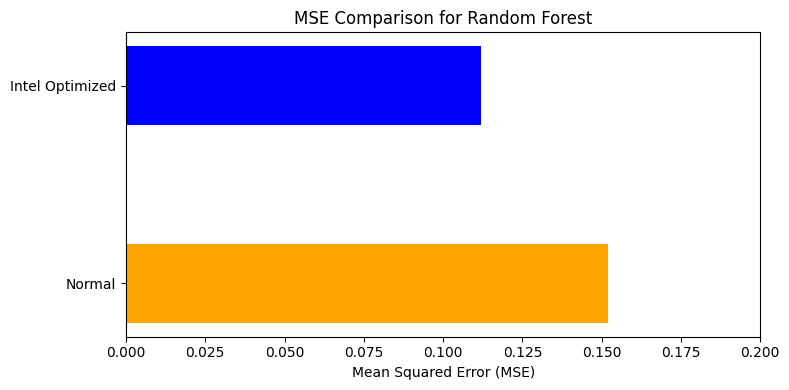

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# MSE values for normal and Intel optimized models
normal_mse_rf = 0.15210000000000046
intel_mse_rf = 0.11194600694444289

# Create a NumPy array with MSE values
mse_values_rf = np.array([normal_mse_rf, intel_mse_rf])

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(8, 4))

# Set the y-ticks
labels_rf = ['Normal', 'Intel Optimized']
x_rf = np.arange(len(labels_rf))

# Create the horizontal bar chart for Random Forest with specified colors
ax.barh(x_rf, mse_values_rf, height=0.4, color=['orange', 'blue'])

# Add labels, title, and legend
ax.set_yticks(x_rf)
ax.set_yticklabels(labels_rf)
ax.set_xlabel('Mean Squared Error (MSE)')
ax.set_title('MSE Comparison for Random Forest')
ax.set_xlim(0, 0.2)  # Adjust x-axis limits for better visibility

# Display the plot
plt.tight_layout()
plt.show()


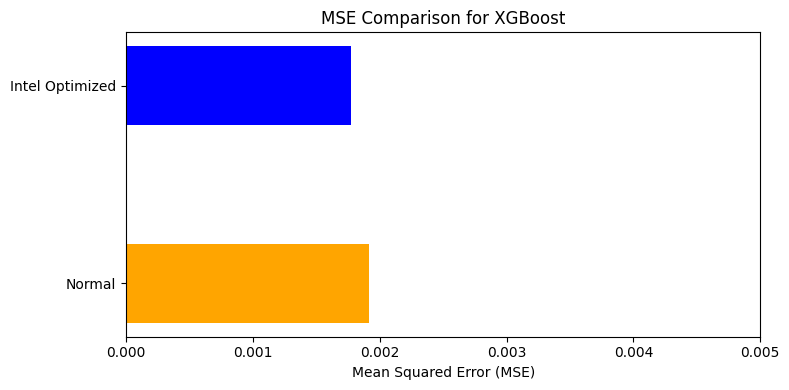

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# MSE values for normal and Intel optimized models
normal_mse_xgb = 0.0019174686312908307
intel_mse_xgb = 0.0017716833972372115

# Create a NumPy array with MSE values
mse_values_xgb = np.array([normal_mse_xgb, intel_mse_xgb])

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(8, 4))

# Set the y-ticks
labels_xgb = ['Normal', 'Intel Optimized']
x_xgb = np.arange(len(labels_xgb))

# Create the horizontal bar chart for XGBoost
ax.barh(x_xgb, mse_values_xgb, height=0.4, color=['orange', 'blue'])

# Add labels, title, and legend
ax.set_yticks(x_xgb)
ax.set_yticklabels(labels_xgb)
ax.set_xlabel('Mean Squared Error (MSE)')
ax.set_title('MSE Comparison for XGBoost')
ax.set_xlim(0, 0.005)  # Adjust x-axis limits for better visibility

# Display the plot
plt.tight_layout()
plt.show()
